In [ ]:
import pandas as pd
import numpy as np
import os

import IPython
import IPython.display
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime, timedelta, date

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1kBqs18UlSE_jeOPxJgiOgpdZLJ0GXJYC' -O weather_pm25_2015-202103.csv

--2022-04-02 11:39:07--  https://docs.google.com/uc?export=download&id=1kBqs18UlSE_jeOPxJgiOgpdZLJ0GXJYC
Resolving docs.google.com (docs.google.com)... 142.251.107.139, 142.251.107.113, 142.251.107.102, ...
Connecting to docs.google.com (docs.google.com)|142.251.107.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-0c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/85tpmgh27mujg5rjgpmgs9fk7u3p5gsc/1648899525000/09102653009714548461/*/1kBqs18UlSE_jeOPxJgiOgpdZLJ0GXJYC?e=download [following]
--2022-04-02 11:39:09--  https://doc-08-0c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/85tpmgh27mujg5rjgpmgs9fk7u3p5gsc/1648899525000/09102653009714548461/*/1kBqs18UlSE_jeOPxJgiOgpdZLJ0GXJYC?e=download
Resolving doc-08-0c-docs.googleusercontent.com (doc-08-0c-docs.googleusercontent.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to doc-08-0c-docs.googleusercontent.com (doc-08-0c-docs

In [ ]:
df = pd.read_csv('weather_pm25_2015-202103.csv',parse_dates=['date'], index_col='date')

#time series data
df['month'] = df.index.month
df['year'] = df.index.year
df['hour'] = df.index.hour
df['day_of_week'] = df.index.map(lambda x: x.isocalendar()[2])
df['no_of_week'] = df.index.map(lambda x: x.isocalendar()[1])
df['year_month'] = df.apply(lambda x: datetime(x.year, x.month, 1),axis=1)

In [ ]:
variables_corr = ['PM25_nie', 'PM25_wok',
                  'cloudCover', 'humidity', 'precipitation',
                  'pressure', 'temperature', 'visibility', 'windBearing',
                  'windSpeed', 'month', 'year', 'hour', 'day_of_week']

In [ ]:
df[variables_corr].corr()

,PM25_nie,PM25_wok,cloudCover,humidity,precipitation,pressure,temperature,visibility,windBearing,windSpeed,month,year,hour,day_of_week
PM25_nie,1.000000,0.943704,0.023277,0.331017,-0.076766,0.131195,-0.474568,-0.375641,-0.075322,-0.330204,-0.138632,-0.064771,-0.022030,0.003292
PM25_wok,0.943704,1.000000,0.005481,0.371692,-0.075959,0.144004,-0.499740,-0.381124,-0.117774,-0.334712,-0.135751,-0.107955,-0.067450,0.017042
cloudCover,0.023277,0.005481,1.000000,0.341401,0.169501,-0.223169,-0.215189,-0.231727,0.100059,0.160916,-0.012131,0.079032,0.023352,0.010191
humidity,0.331017,0.371692,0.341401,1.000000,0.153482,-0.096045,-0.538335,-0.343141,0.074252,-0.154793,0.082041,0.013144,-0.286507,0.000205
precipitation,-0.076766,-0.075959,0.169501,0.153482,1.000000,-0.186673,0.050135,-0.177498,0.012243,0.092204,0.028849,0.017115,0.011165,-0.012234
pressure,0.131195,0.144004,-0.223169,-0.096045,-0.186673,1.000000,-0.149083,0.019263,-0.084055,-0.188370,0.077434,-0.052359,-0.011044,-0.000458
temperature,-0.474568,-0.499740,-0.215189,-0.538335,0.050135,-0.149083,1.000000,0.292747,-0.010648,-0.016272,0.243165,-0.032074,0.141182,0.006240
visibility,-0.375641,-0.381124,-0.231727,-0.343141,-0.177498,0.019263,0.292747,1.000000,-0.008898,0.076649,0.094980,0.085523,0.043429,0.000130
windBearing,-0.075322,-0.117774,0.100059,0.074252,0.012243,-0.084055,-0.010648,-0.008898,1.000000,0.115348,0.008645,0.008786,0.038618,0.008297
windSpeed,-0.330204,-0.334712,0.160916,-0.154793,0.092204,-0.188370,-0.016272,0.076649,0.115348,1.000000,-0.015942,0.090452,0.090957,-0.032376


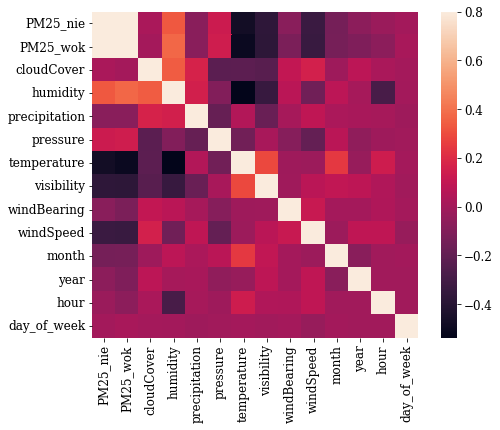

In [ ]:
plt.rcParams.update({'font.size': 12, 'font.family':'serif'})
corrmat = df[variables_corr].corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
#VIF
df_cor = df[variables_corr].corr()
vifs = pd.Series(np.linalg.inv(df_cor.values).diagonal(), index=df_cor.index)
vifs.sort_values(ascending=False)

PM25_wok         8.468153
PM25_nie         8.019604
temperature      2.181075
humidity         2.168023
visibility       1.339771
windSpeed        1.338513
cloudCover       1.308347
pressure         1.233496
month            1.209560
hour             1.136253
precipitation    1.133054
windBearing      1.058694
year             1.054667
day_of_week      1.003156
dtype: float64